In [1]:
from sklearn import cluster
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import colors, cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/

In [3]:
# this is from the exampple data set
G = nx.karate_club_graph()

In [4]:
# pos = nx.spring_layout(G)

In [5]:
# True labels of the group each student (node) unded up in. Found via the original paper
# y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [6]:
# draw_communities(G, y_true, pos)

In [7]:
def graph_to_edge_matrix(G):
    """Convert a networkx graph into an edge matrix.
    See https://www.wikiwand.com/en/Incidence_matrix for a good explanation on edge matrices
   
    Parameters
    ----------
    G : networkx graph
    """
    # Initialize edge matrix with zeros
    edge_mat = np.zeros((len(G), len(G)), dtype=int)

    # Loop to set 0 or 1 (diagonal elements are set to 1)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[node][neighbor] = 1
        edge_mat[node][node] = 1

    return edge_mat

### load the patent data set from citation network 2010~2015

In [8]:
edge_mat = graph_to_edge_matrix(G)
edge_mat

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [20]:
edge_mat = np.load('edge_mat.npy')
edge_mat.shape

(7370, 7370)

In [21]:
y_true = np.load('true_label.npy').tolist()
len(y_true)

7370

In [22]:
# 36 unique classes
len(list(set(y_true)))

37

In [10]:
# size = 5_000  # 8 mins for the k-means to run
# size = 50
# edge_mat = np.random.rand(size,size)
# y_true = np.random.randint(5, size=size).tolist()

In [23]:
k_clusters = 36
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters=k_clusters, n_init=100, max_iter=100)

In [24]:
# algorithms['agglom'] = cluster.AgglomerativeClustering(n_clusters=k_clusters, linkage="ward")

In [25]:
# algorithms['spectral'] = cluster.SpectralClustering(n_clusters=k_clusters, affinity="precomputed", n_init=200)

In [26]:
# algorithms['affinity'] = cluster.AffinityPropagation(damping=0.6)

In [27]:
%%time
# Fit all models
for model in algorithms.values():
    model.fit(edge_mat)
    results.append(list(model.labels_))

CPU times: user 19min 54s, sys: 1min 30s, total: 21min 24s
Wall time: 14min 14s


In [28]:
np.save('results.npy', results)
# results = np.load('results.npy')

In [29]:
nmi_results = []
ars_results = []

y_true_val = list(y_true)

# Append the results into lists
for y_pred in results:
    nmi_results.append(normalized_mutual_info_score(y_true_val, y_pred))
    ars_results.append(adjusted_rand_score(y_true_val, y_pred))

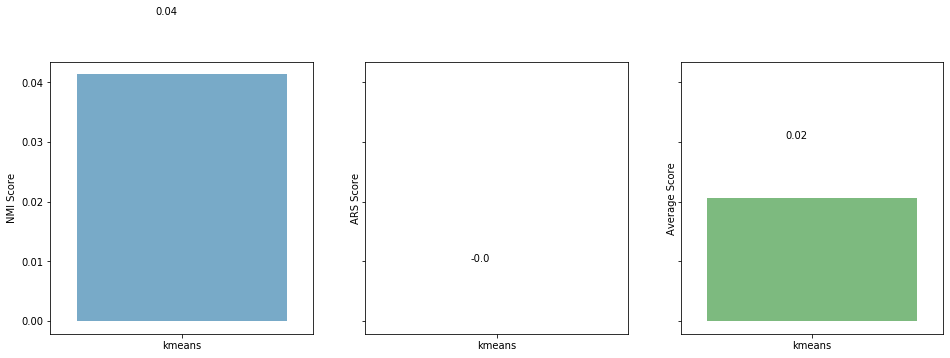

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

x = np.arange(len(results))
avg = [sum(x) / 2 for x in zip(nmi_results, ars_results)]

xlabels = list(algorithms.keys())

sns.barplot(x, nmi_results, palette='Blues', ax=ax1)
sns.barplot(x, ars_results, palette='Reds', ax=ax2)
sns.barplot(x, avg, palette='Greens', ax=ax3)

ax1.set_ylabel('NMI Score')
ax2.set_ylabel('ARS Score')
ax3.set_ylabel('Average Score')

# # Add the xlabels to the chart
ax1.set_xticklabels(xlabels)
ax2.set_xticklabels(xlabels)
ax3.set_xticklabels(xlabels)

# Add the actual value on top of each bar
for i, v in enumerate(zip(nmi_results, ars_results, avg)):
    ax1.text(i - 0.1, v[0] + 0.01, str(round(v[0], 2)))
    ax2.text(i - 0.1, v[1] + 0.01, str(round(v[1], 2)))
    ax3.text(i - 0.1, v[2] + 0.01, str(round(v[2], 2)))

# Show the final plot
plt.show()